#DEV Project - 2015 USA Flights ✈



- AbdelRaouf Khorshed 5000267

- https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=flights.csv


##Importing datasets & libraries 📚

In [ ]:
# Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

We are going to download the necessary file from kaggle. 

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raoufkhorshed","key":"4f00eeacc873c35c0325ea36ef5bbd7f"}'}

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 69 Dec 30 12:12 kaggle.json
/content


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
#Else retry with fresh API token

In [ ]:
!kaggle datasets list

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                 5MB  2022-11-13 15:47:17          14255        408  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india    Credit Card Spending Habits in India           319KB  2022-12-14 07:30:37           1188         48  1.0              
michals22/coffee-dataset                                        Coffee dataset                                  24KB  2022-12-15 20:02:12           3347         76  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce Sales Data

In [ ]:
!kaggle datasets download -d usdot/flight-delays

 99% 189M/191M [00:07<00:00, 29.8MB/s]
100% 191M/191M [00:07<00:00, 28.1MB/s]


In [ ]:
!unzip flight-delays.zip

Archive:  flight-delays.zip
  inflating: airlines.csv            
  inflating: airports.csv            
  inflating: flights.csv             


##Reading the data & gathering information 📖

####Airlines_df


In [ ]:
airlines_df = pd.read_csv("/content/airlines.csv")
airports_df = pd.read_csv("/content/airports.csv")
flights_df = pd.read_csv("/content/flights.csv")
airlines_df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.



,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
print("Airlines df shape: ", airlines_df.shape)
print("Airlines df unique values: ", airlines_df['IATA_CODE'].unique().size)

Airlines df shape:  (14, 2)
Airlines df unique values:  14


####Airports_df

In [ ]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
print("Airports df shape: ", airports_df.shape)
print("Aiports df unique values: ", airports_df['IATA_CODE'].unique().size)

Airports df shape:  (322, 7)
Aiports df unique values:  322


In [ ]:
airports_df['COUNTRY'].value_counts()

USA    322
Name: COUNTRY, dtype: int64

####Flights_df

- YEAR - Year of Flight Trip
- MONTH - Month of Flight Trip 
- DAY - Day of flight trip
- DAY_OF_WEEK - Day of week of the Flight Trip 
- AIRLINE - Airline Identifier 
- FLIGHT_NUMBER - Flight Identifier
- TAIL_NUMBER - Aircraft identifier 
- DESTINATION_AIRPORT - Destination Airport 
- SCHEDULED_DEPARTURE - Planned Departure Time 
- DEPARTURE_DELAY - Total Delay on Depature
- DEPATURE TIME - (WHEELS_OFF - TAXI_OUT)
- TAXI_OUT - The time duration elapsed between departure from the origin airport gate and wheels off. 
- WHEELS_OFF - The time point that the aircraft's wheels leave the ground 
- SCHEDULED_TIME - Planned time amount needed for the flight trip 
- ELAPSED_TIME - AIR_TIME + TAXI_IN + TAXI_OUT
- AIR_TIME = The time duration between WHEELS_OFF and WHEELS_ON time 
- DISTANCE - Distance between two airports
- WHEELS_ON - The time point that the aircraft's wheels tough on the ground 
- TAXI_IN - The time duration elapsed between WHEELS_ON and gate arrival at the destinatio airport
- SCHEDULED_ARRIVAL - Planned arrival time 
- ARRIVAL_TIME - WHEELS_ON + TAXI_IN
- ARRIVAL_DELAY - ARRIVAL_TIME - SCHEDULED_ARRIVAL
- DIVERTED - Aircraft landed on airport that out of schedule
- CANCELED - Flight Canceled (1 = canceled)


In [ ]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
flights_df['AIRLINE'].value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [ ]:
flights_df.shape

(5819079, 31)

##Data Integration 📥

We're going to do all the necessary integration for our new dataset. 

In [ ]:
#df1 = pd.merge(flights_df, airlines_df, on = 'Airlines')
#df1 = pd.concat([airlines_df, flights_df], axis = 1, join = 'inner')
df1 = pd.merge(airlines_df, flights_df, left_on="IATA_CODE", right_on="AIRLINE")
df1 = pd.merge(airports_df, df1, left_on="IATA_CODE", right_on="ORIGIN_AIRPORT" )
df1 = pd.merge(airports_df, df1, left_on="IATA_CODE", right_on="DESTINATION_AIRPORT" )

In [ ]:
df1.head()

,IATA_CODE,AIRPORT_x,CITY_x,STATE_x,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE_x,AIRPORT_y,CITY_y,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,...,2252.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,...,2227.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,...,2221.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,...,2226.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,...,2223.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(df1)

['IATA_CODE',
 'AIRPORT_x',
 'CITY_x',
 'STATE_x',
 'COUNTRY_x',
 'LATITUDE_x',
 'LONGITUDE_x',
 'IATA_CODE_x',
 'AIRPORT_y',
 'CITY_y',
 'STATE_y',
 'COUNTRY_y',
 'LATITUDE_y',
 'LONGITUDE_y',
 'IATA_CODE_y',
 'AIRLINE_x',
 'YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE_y',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [ ]:
df1[['IATA_CODE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRPORT_x', 'AIRPORT_y']]

,IATA_CODE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRPORT_x,AIRPORT_y
0,ABE,ATL,ABE,Lehigh Valley International Airport,Hartsfield-Jackson Atlanta International Airport
1,ABE,ATL,ABE,Lehigh Valley International Airport,Hartsfield-Jackson Atlanta International Airport
2,ABE,ATL,ABE,Lehigh Valley International Airport,Hartsfield-Jackson Atlanta International Airport
3,ABE,ATL,ABE,Lehigh Valley International Airport,Hartsfield-Jackson Atlanta International Airport
4,ABE,ATL,ABE,Lehigh Valley International Airport,Hartsfield-Jackson Atlanta International Airport
...,...,...,...,...,...
5332909,YUM,PHX,YUM,Yuma International Airport,Phoenix Sky Harbor International Airport
5332910,YUM,PHX,YUM,Yuma International Airport,Phoenix Sky Harbor International Airport
5332911,YUM,PHX,YUM,Yuma International Airport,Phoenix Sky Harbor International Airport
5332912,YUM,PHX,YUM,Yuma International Airport,Phoenix Sky Harbor International Airport


We've identified that 'AIRPORT_y' is the destination and 'AIRPORT_x' is the origin 

In [ ]:
df1[['AIRLINE_x', 'AIRLINE_y']]

,AIRLINE_x,AIRLINE_y
0,Delta Air Lines Inc.,DL
1,Delta Air Lines Inc.,DL
2,Delta Air Lines Inc.,DL
3,Delta Air Lines Inc.,DL
4,Delta Air Lines Inc.,DL
...,...,...
5332909,Skywest Airlines Inc.,OO
5332910,Skywest Airlines Inc.,OO
5332911,Skywest Airlines Inc.,OO
5332912,Skywest Airlines Inc.,OO


We've identified that AIRPORT_y is the IATA_CODE

In [ ]:
df1.shape

(5332914, 47)

##Data Cleaning 🧹

We need to check for outliers, duplicates, null values,  change the columns names, drop the useless columns.

In [ ]:
df1.rename(columns = {'AIRPORT_y':'DEST_AIRPORT', 'AIRPORT_x':'ORG_AIRPORT', 'CITY_y':'DEST_CITY',
                      'CITY_x':'ORG_CITY', 'STATE_y':'DEST_STATE', 'STATE_x':'ORG_STATE', 'LATITUDE_y':'DEST_LATITUDE',
                      'LATITUDE_x':'ORG_LATITUDE', 'LONGITUDE_y':'DEST_LONGITUDE', 'LONGITUDE_x':'ORG_LONGITUDE', 
                      'AIRLINE_x':'AIRLINE'}, inplace = True)
df1.drop(['COUNTRY_x', 'COUNTRY_y', 'IATA_CODE_x', 'IATA_CODE_y', 'AIRLINE_y', 'IATA_CODE', 'DESTINATION_AIRPORT', 'ORIGIN_AIRPORT'], axis=1, inplace = True)

In [ ]:
#plt.figure(figsize=(9,3),dpi=100)
#sns.heatmap(df1.isnull())

In [ ]:
print(df1.isnull().sum()*100/len(df1))

ORG_AIRPORT             0.000000
ORG_CITY                0.000000
ORG_STATE               0.000000
ORG_LATITUDE            0.086444
ORG_LONGITUDE           0.086444
DEST_AIRPORT            0.000000
DEST_CITY               0.000000
DEST_STATE              0.000000
DEST_LATITUDE           0.086351
DEST_LONGITUDE          0.086351
AIRLINE                 0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.269402
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.571636
DEPARTURE_DELAY         1.571636
TAXI_OUT                1.624103
WHEELS_OFF              1.624103
SCHEDULED_TIME          0.000113
ELAPSED_TIME            1.908600
AIR_TIME                1.908600
DISTANCE                0.000000
WHEELS_ON               1.686545
TAXI_IN                 1.686545
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.686545
ARRIVAL_DE

We're going to drop all the rows that have any null values, since all of the values are only a small percentage and drop any columns with above 80% null values. 

In [ ]:
print("Dataframe Shape Before:", df1.shape)
df1 = df1.dropna(axis='columns', thresh = int(0.8 * len(df1)))
print("Dataframe Shape After:", df1.shape)

Dataframe Shape Before: (5332914, 39)
Dataframe Shape After: (5332914, 33)


In [ ]:
df1['CANCELLED'].value_counts()

0    5245484
1      87430
Name: CANCELLED, dtype: int64

We're going to drop any rows that have a null value since the rest of the columns have on average 1% missing values. 

In [ ]:
print("Dataframe Shape Before:", df1.shape)
df1 = df1.dropna()
print("Dataframe Shape Before:", df1.shape)

Dataframe Shape Before: (5332914, 33)
Dataframe Shape Before: (5222000, 33)


###Outliers

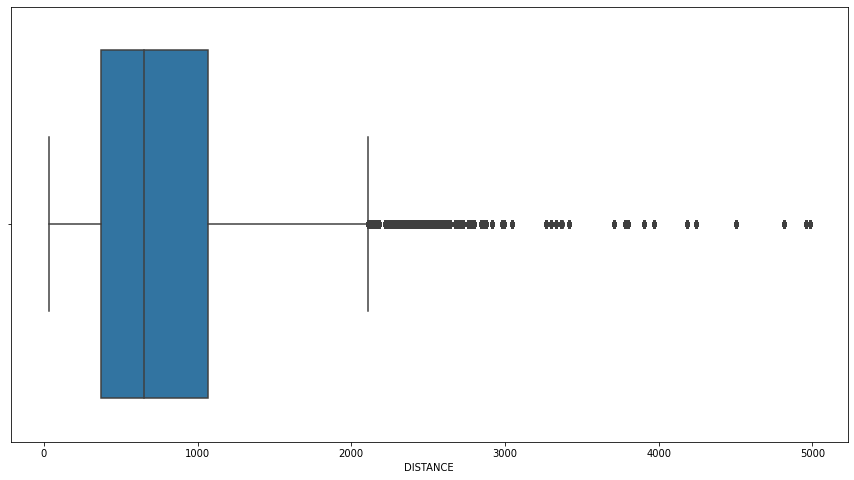

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=df1['DISTANCE'])

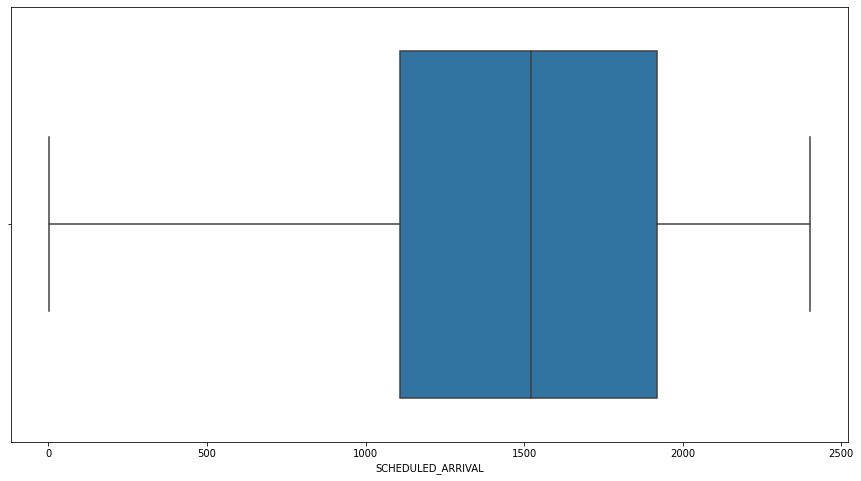

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=df1['SCHEDULED_ARRIVAL'])

The distance boxplot have a lot of flights that are out of range however those points don't seem to be outliers becasue a box plot's simplicity also sets limitations on the density of data that it can show. With a box plot, we miss out on the ability to observe the detailed shape of distribution, such as if there are oddities in a distribution's modality (number of 'humps' or peaks) and skew. 

Final Dataframe

In [ ]:
df1.head()

,ORG_AIRPORT,ORG_CITY,ORG_STATE,ORG_LATITUDE,ORG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.4404,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,...,111.0,85.0,692,2248.0,4.0,2251,2252.0,1.0,0,0
1,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.4404,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,...,115.0,93.0,692,2222.0,5.0,2225,2227.0,2.0,0,0
2,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.4404,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,...,109.0,93.0,692,2217.0,4.0,2225,2221.0,-4.0,0,0
3,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.4404,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,...,115.0,97.0,692,2222.0,4.0,2225,2226.0,1.0,0,0
4,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.4404,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,...,113.0,89.0,692,2219.0,4.0,2225,2223.0,-2.0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5332913
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ORG_AIRPORT          object 
 1   ORG_CITY             object 
 2   ORG_STATE            object 
 3   ORG_LATITUDE         float64
 4   ORG_LONGITUDE        float64
 5   DEST_AIRPORT         object 
 6   DEST_CITY            object 
 7   DEST_STATE           object 
 8   DEST_LATITUDE        float64
 9   DEST_LONGITUDE       float64
 10  AIRLINE              object 
 11  YEAR                 int64  
 12  MONTH                int64  
 13  DAY                  int64  
 14  DAY_OF_WEEK          int64  
 15  FLIGHT_NUMBER        int64  
 16  TAIL_NUMBER          object 
 17  SCHEDULED_DEPARTURE  int64  
 18  DEPARTURE_TIME       float64
 19  DEPARTURE_DELAY      float64
 20  TAXI_OUT             float64
 21  WHEELS_OFF           float64
 22  SCHEDULED_TIME       float64
 23  ELAPSED_TIME         float64
 24

In [ ]:
df1[['TAXI_OUT', 'WHEELS_OFF']]

,TAXI_OUT,WHEELS_OFF
0,22.0,2123.0
1,17.0,2049.0
2,12.0,2044.0
3,14.0,2045.0
4,20.0,2050.0
...,...,...
5332909,21.0,1003.0
5332910,22.0,1122.0
5332911,18.0,1454.0
5332912,15.0,1751.0


##Feature Engineering ⚙

####Datetime

In [ ]:
df1["Date"] = pd.to_datetime(dict(year=df1.YEAR, month=df1.MONTH, day=df1.DAY))

In [ ]:
df1['Date']

0         2015-01-04
1         2015-01-05
2         2015-01-06
3         2015-01-07
4         2015-01-08
             ...    
5332909   2015-12-31
5332910   2015-12-31
5332911   2015-12-31
5332912   2015-12-31
5332913   2015-12-31
Name: Date, Length: 5222000, dtype: datetime64[ns]

####Speed


In [ ]:
df1['SPEED'] = 60*df1['DISTANCE']/df1['AIR_TIME']

####Taxi 

Remind that:
- TAXI_IN = ARRIVAL_TIME - WHEELS_ON
- TAXI_OUT = WHEELS_OFF - DEPARTURE_TIME

In [ ]:
df1['TAXI_DIFF'] = df1['TAXI_OUT'] - df1['TAXI_IN']

##Analysis 📋

###Analysis on **OLD** features 📊

In [ ]:
# Import Tableau Visualisation 
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/USFlightDelaysCancellations/FlightDelays-PolitcalDestinationMap?:embed=y&:display_count=yes', width=500, height=500)

In [ ]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black', 'grey', 'cyan'];

***Where are most flights taken from?***
- To answer this question we visualized the highest distribution between the origin airports. As we can see the highest percentage is Martsfield-Jackson Atlanta International Aiport. 

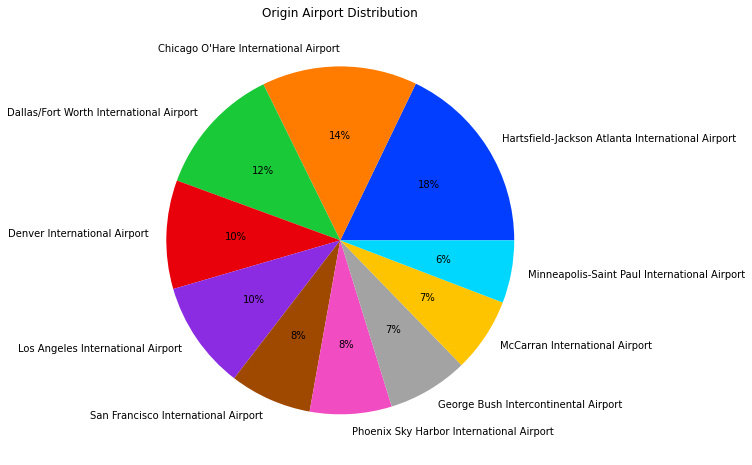

In [ ]:
#Define the data
df_temp = df1['ORG_AIRPORT'].value_counts()[:10]
label = df_temp.index

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

fig = plt.figure(figsize=(15,8))
plt.pie(data, labels=label, colors=palette_color, autopct='%.0f%%')
plt.title('Origin Airport Distribution')
plt.show()

***Which CITY are most flights taken from?***
- To answer this question we visualized the distribution of the origin city (where flights are taken from). As we can see CHICAGO has the highest distribution and Atlanta following up closely. 

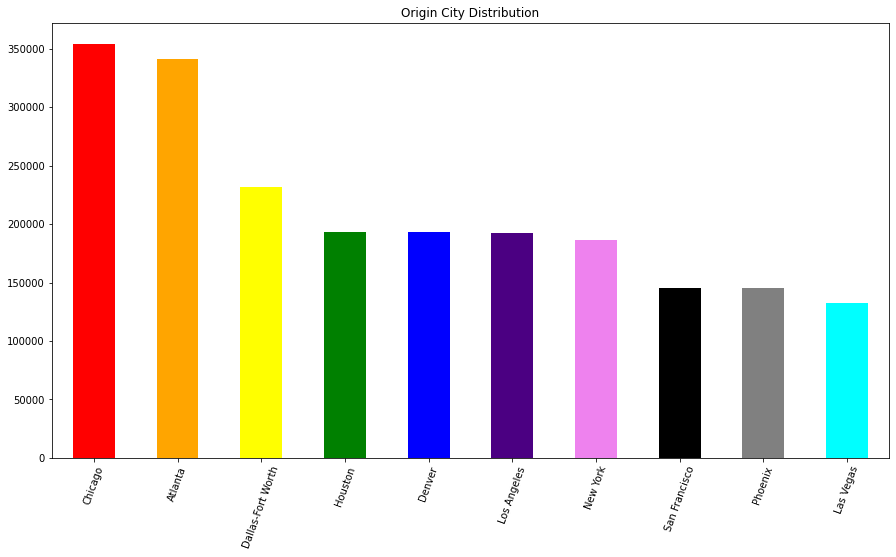

In [ ]:
df_temp = df1.ORG_CITY.value_counts()[:10]
fig = plt.figure(figsize=(15,8))
df_temp.plot.bar(rot=70, title="Origin City Distribution", color=colors)

***Which CITY are most flights going to?***
- To answer this question we once again visualized the destination city distribution to check which has the highest count. CHICAGO and Atlanta once again come at a close first and second respectively. We can also see the most of the origin and destination city distribution is very similar this implies that manmy people make return flights. 

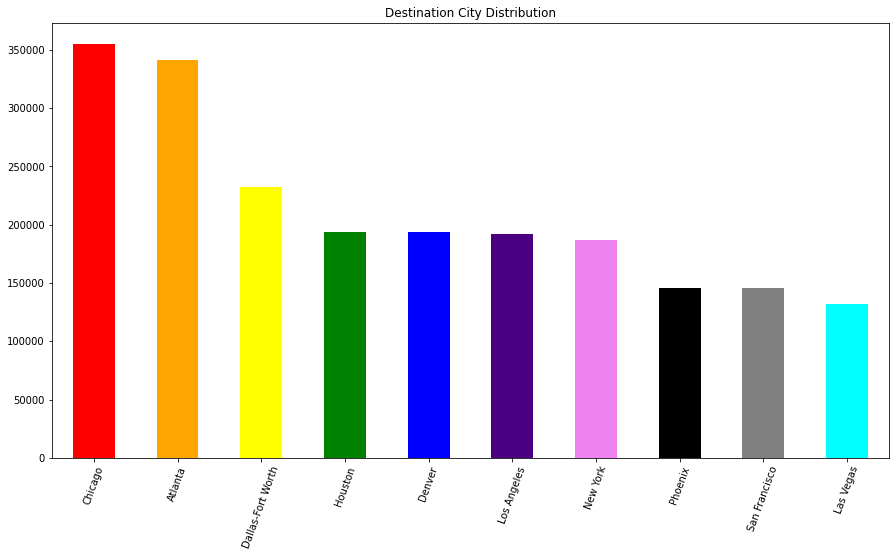

In [ ]:
df_temp = df1.DEST_CITY.value_counts()[:10]
fig = plt.figure(figsize=(15,8))
df_temp.plot.bar(rot=70, title="Destination City Distribution", color=colors)

***Which is the most preferred airline?***
- To answer this querstion we visualized and compared the airline count between all the airlines. SOUTHWEST AIRLINES CO. is seemingly the most preferred airlines in the USA by far. 

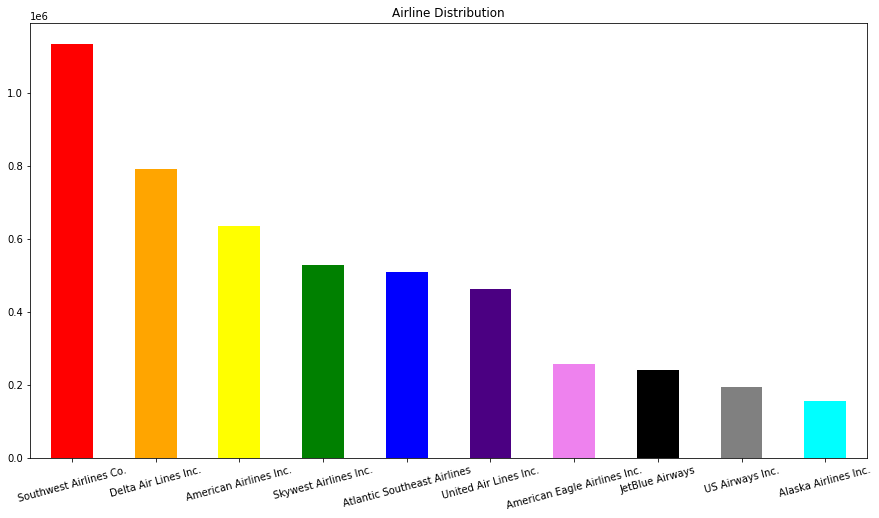

In [ ]:
df_temp = df1.AIRLINE.value_counts()[:10]
fig = plt.figure(figsize=(15,8))
df_temp.plot.bar(rot=15, title="Airline Distribution", color=colors)

***Which month do flights occur the most?***
- We visualized the month and its respective flight count and we came to the conclusion that the most flights are made during March - August with the highest being July. The rest of the year there is a significant decrease in flights. 

[Text(0.5, 1.0, 'Number of Flights Per Month')]

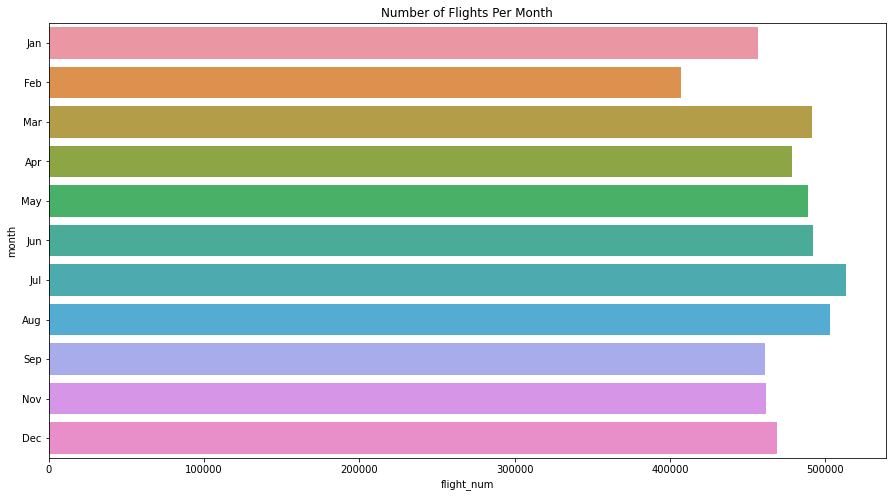

In [ ]:
df_temp = df1.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
df_temp.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_temp.month = df_temp.month.map(month)

fig = plt.figure(figsize=(15,8))
sns.barplot(data=df_temp, x='flight_num', y='month').set(title='Number of Flights Per Month')

###Analysis on **NEW** features 📊

####Taxi

***Which airline has the biggest and smallest Taxi difference?***
- We can see in the below visualization that the highest Taxi difference is from JETLINE AIRWAYS and the lowest Taxi differncet is HUWAIIAN AIRLINES INC.

[Text(0.5, 1.0, 'Mean Taxi Difference By Airlines')]

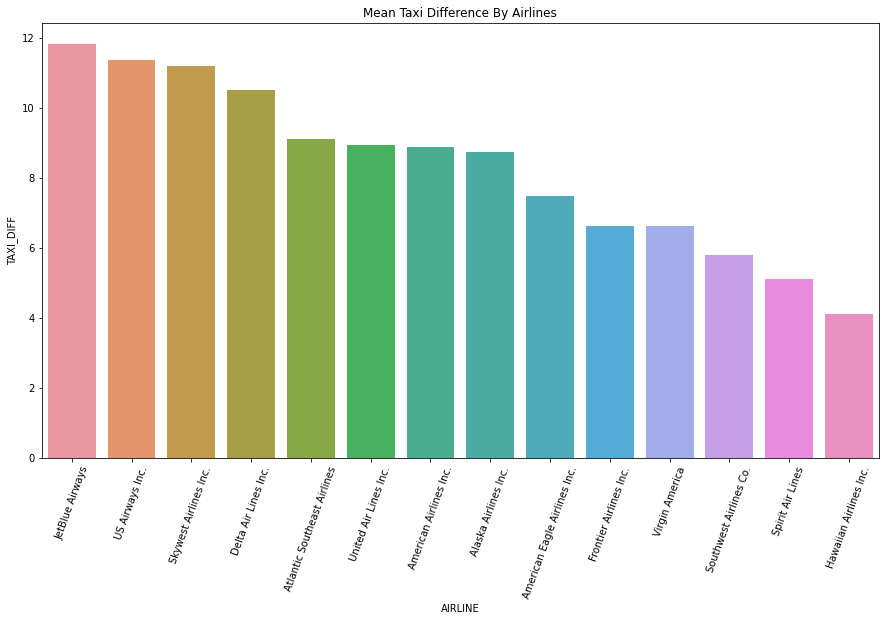

In [ ]:
df_temp = df1.groupby('AIRLINE').TAXI_DIFF.mean().to_frame().sort_values(by='TAXI_DIFF',ascending=False).round(2)
x = df_temp.index
y = df_temp.TAXI_DIFF
fig = plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
#df_temp.plot.bar(rot=15, title="Mean Taxi Difference By Airlines", color=colors)
sns.barplot(data=df_temp, x=x, y=y).set(title='Mean Taxi Difference By Airlines')

####Speed

***Which airline have the fastest aircrafts and which have the slowest?***
- Given the below visualization, UNITED AIRLINES INC. have the fastest aircrafts and HUWAIIAN AIRLINES INC. have the slowest aircrafts. This doesn't necessary mean the aircrafts themselves are slow, it could possibly mean that the airline company chooses to fly slower to perhaps save fuel.

[Text(0.5, 1.0, 'Mean Speed By Airlines')]

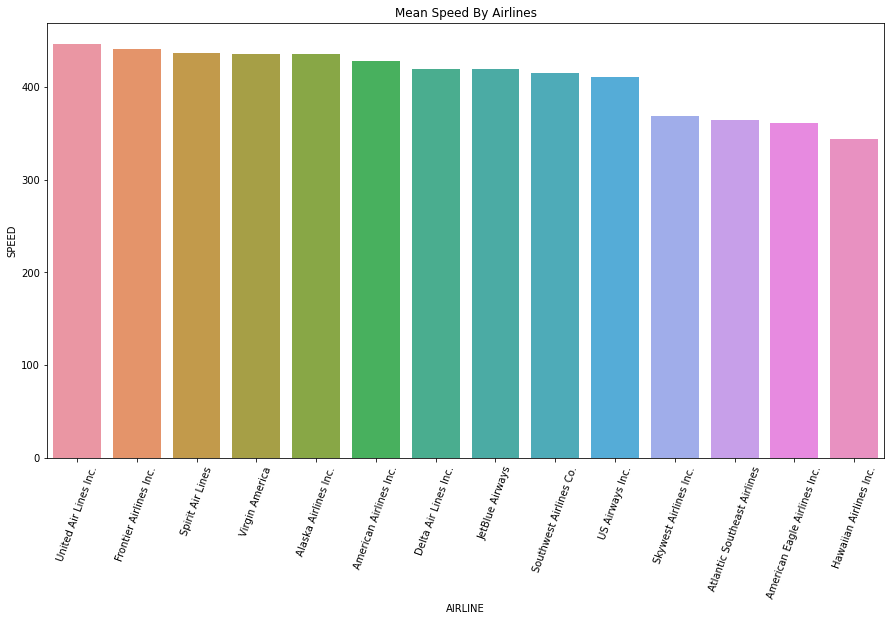

In [ ]:
df_temp = df1.groupby('AIRLINE').SPEED.mean().to_frame().sort_values(by='SPEED',ascending=False).round(2)
x = df_temp.index
y = df_temp.SPEED
fig = plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
sns.barplot(data=df_temp, x=x, y=y).set(title='Mean Speed By Airlines')